# Dataset
https://www.kaggle.com/spscientist/students-performance-in-exams

Modified from
https://github.com/adsieg/text_similarity/blob/529337838839515b5b2e8cb6cac3452d3ff663dc/.ipynb_checkpoints/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration-checkpoint.ipynb

# Loading GloVe model 
Wikipedia 2014 + Gigaword 5 (6B tokens 50d)
https://nlp.stanford.edu/projects/glove/
https://www.kaggle.com/rtatman/glove-global-vectors-for-word-representation

NOTE: Consider switching datasets because of shortening of words in db
TODO: Look into negative cosine similarity

In [9]:
# NOTE1: GloVe embeddings look like this:
# the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 ...
# NOTE2: Has embeddings for punctuation
# NOTE3: Does not have any uppercase words in embeddings

import numpy as np

glove_model = {}
with open('../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt', encoding="utf8" ) as f:
    section = f.readlines()
    
for line in section:
    split_line = line.split(" ")
    word = split_line[0]
    if word.isalpha(): # Will be used to only keep the words in embeddings
        embedding = np.array([float(val) for val in split_line[1:]]) # 1: for only the embeddings. Reference Note1
        glove_model[word] = embedding

# Cosine Similarity

In [10]:
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def preprocess(raw_text):
    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))
    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    return (1- scipy.spatial.distance.cosine(glove_model[word1], glove_model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu", annot=True)
    return ax_blue

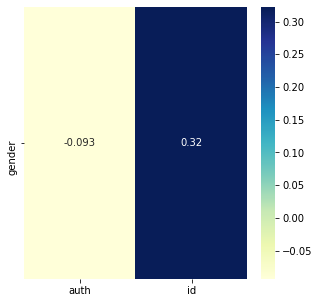

In [20]:
ss1 = 'gender'
ss2 = 'auth_id'
# ss2 = 'male'

# gender
# race/ethnicity
# parental level of education
# lunch
# test preparation course
# math score
# reading score
# writing score

# model = glove_model
heat_map_matrix_between_two_sentences(ss1,ss2)